# Zipline Integration Sample

In [1]:
import matplotlib.pyplot as plt

import zipline
%load_ext zipline

## Simple Zipline Scenario

In [19]:
%%zipline --start 2018-1-1 --end 2019-10-31 --bundle tomcsv --capital-base 10000
from zipline.api import symbol, order, record
def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2018-01-02 21:00:00+00:00,172.260,NaN,0.000000,NaN,0.007157,NaN,NaN,0.000000e+00,10000.000000,0.00,...,0.0,0.0,0,NaN,10000.000000,0.00,0.00,1,[],0.0
2018-01-03 21:00:00+00:00,172.230,0.000978,-0.000087,-0.188806,0.013528,0.009341,0.104680,-1.723171e+03,8276.828850,1722.30,...,0.0,0.0,0,-11.224972,10000.000000,0.00,0.00,2,[{'order_id': '192e8d50e136413ca3127c04bbe71ec...,0.0
2018-01-04 21:00:00+00:00,173.030,0.006964,0.000625,0.452258,0.017800,0.024078,-0.268888,-1.731175e+03,6545.653700,3460.60,...,0.0,0.0,0,65.800145,8276.828850,1722.30,1722.30,3,[{'order_id': 'ef3d9dfa7b194683877ea027e459381...,0.0
2018-01-05 21:00:00+00:00,175.000,0.029451,0.004477,0.022676,0.024582,0.020576,0.168899,-1.750885e+03,4794.768700,5250.00,...,0.0,0.0,0,407.684565,6545.653700,3460.60,3460.60,4,[{'order_id': '87654291cdc74869830c1ce05255068...,0.0
2018-01-08 21:00:00+00:00,174.350,0.033910,0.002439,-0.658031,0.026456,0.035112,0.591891,-1.744382e+03,3050.386950,6974.00,...,0.0,0.0,0,8.548104,4794.768700,5250.00,5250.00,5,[{'order_id': 'd42bd33f0aaf4ec1a4de473af6a7a22...,0.0
2018-01-09 21:00:00+00:00,174.330,0.030627,0.002271,-0.490315,0.028779,0.036850,0.490340,-1.744182e+03,1306.205300,8716.50,...,0.0,0.0,0,7.243343,3050.386950,6974.00,6974.00,6,[{'order_id': 'aa76a37a534a47bb8a05a8cfd769738...,0.0
2018-01-10 21:00:00+00:00,174.290,0.028244,0.001982,-0.196742,0.027205,0.050476,0.276903,-1.743781e+03,-437.576150,10457.40,...,0.0,0.0,0,5.802134,1306.205300,8716.50,8716.50,7,[{'order_id': 'd55055f81c45470d9a3398c8539d3fb...,0.0
2018-01-11 21:00:00+00:00,175.280,0.040693,0.007834,-0.262433,0.034700,0.050584,0.472277,-1.753686e+03,-2191.262550,12269.60,...,0.0,0.0,0,21.352966,-437.576150,10457.40,10457.40,8,[{'order_id': '7049a10f0f8b4078a55d33466f116a2...,0.0
2018-01-12 21:00:00+00:00,177.090,0.071795,0.020414,-0.284216,0.041445,0.048781,0.747774,-1.771795e+03,-3963.058000,14167.20,...,0.0,0.0,0,52.226175,-2191.262550,12269.60,12269.60,9,[{'order_id': '4dfded11dc434324ad54892d3004d34...,0.0
2018-01-16 21:00:00+00:00,176.190,0.082514,0.013125,-0.547162,0.037885,0.060875,0.934669,-1.762791e+03,-5725.848950,15857.10,...,0.0,0.0,0,8.893081,-3963.058000,14167.20,14167.20,10,[{'order_id': '6b792d2bd82f496d805c5e486b192f7...,0.0


In [20]:
aapl = _

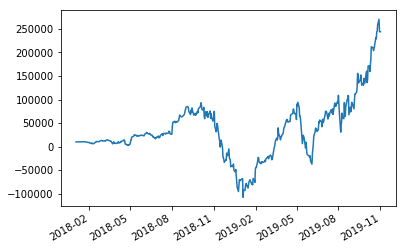

In [21]:
aapl['portfolio_value'].plot();

## Dual Moving Average Crossover

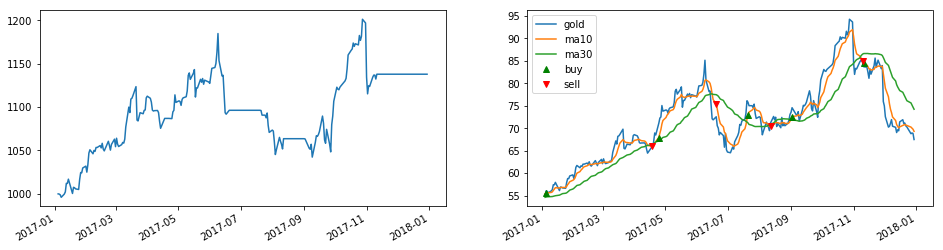

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-01-03 21:00:00+00:00,NaN,0.000000,NaN,0.007650,NaN,NaN,0.000000,1000.000000,0.00,0.00,...,0.0,0.0,0,NaN,1000.000000,0.00,0.00,1,[],0.0
2017-01-04 21:00:00+00:00,0.002931,-0.000261,-0.295992,0.013645,0.019091,0.153539,-504.531135,495.468865,504.27,504.27,...,0.0,0.0,0,-11.224972,1000.000000,0.00,0.00,2,"[{'sid': Equity(64 [AEIS]), 'amount': 9, 'pric...",0.0
2017-01-05 21:00:00+00:00,0.006565,-0.001071,-0.188754,0.012839,0.070897,0.091819,0.000000,495.468865,503.46,503.46,...,0.0,0.0,0,-11.534803,495.468865,504.27,504.27,3,[],0.0
2017-01-06 21:00:00+00:00,0.020753,-0.003951,-0.376598,0.016463,0.058146,0.123505,0.000000,495.468865,500.58,500.58,...,0.0,0.0,0,-10.441108,495.468865,503.46,503.46,4,[],0.0
2017-01-09 21:00:00+00:00,0.037857,-0.000261,0.166330,0.013108,0.072753,-0.271373,0.000000,495.468865,504.27,504.27,...,0.0,0.0,0,-0.589922,495.468865,500.58,500.58,5,[],0.0
2017-01-10 21:00:00+00:00,0.037737,0.002259,0.269318,0.013108,0.067245,-0.316587,0.000000,495.468865,506.79,506.79,...,0.0,0.0,0,4.895613,495.468865,504.27,504.27,6,[],0.0
2017-01-11 21:00:00+00:00,0.066597,0.012159,0.584499,0.015971,0.061509,-0.256953,0.000000,495.468865,516.69,516.69,...,0.0,0.0,0,24.247532,495.468865,506.79,506.79,7,[],0.0
2017-01-12 21:00:00+00:00,0.062585,0.011979,0.435114,0.013421,0.062955,-0.137517,0.000000,495.468865,516.51,516.51,...,0.0,0.0,0,22.310459,495.468865,516.69,516.69,8,[],0.0
2017-01-13 21:00:00+00:00,0.061238,0.016929,0.524924,0.015747,0.058980,-0.120126,0.000000,495.468865,521.46,521.46,...,0.0,0.0,0,29.629506,495.468865,516.51,516.51,9,[],0.0
2017-01-17 21:00:00+00:00,0.107523,0.000459,-0.147171,0.012168,0.061573,0.534634,0.000000,495.468865,504.99,504.99,...,0.0,0.0,0,0.203041,495.468865,521.46,521.46,10,[],0.0


In [200]:
%%zipline --start 2017-1-1 --end 2018-1-1 --capital-base 1000
from zipline.api import sid, order_target_percent, record
import matplotlib.pyplot as plt
def initialize(context):
    context.i = 0
    context.gold = sid(64)

def handle_data(context, data):
    context.i += 30
    if context.i < 30:
        return
    
    ma10 = data.history(context.gold, 'price', bar_count=10, frequency='1d').ewm(span=10).mean().iloc[-1]
    ma30 = data.history(context.gold, 'price', bar_count=30, frequency='1d').mean()
    
    if ma10 > ma30:
        if data.can_trade(context.gold):
            order_target_percent(context.gold, 0.5)
    elif ma10 < ma30:
        if data.can_trade(context.gold):
            order_target_percent(context.gold, 0)
        
    record(
        gold=data.current(context.gold, 'price'),
        ma10=ma10,
        ma30=ma30
    )

def analyze(context, perf):
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    perf['portfolio_value'].plot(ax=ax[0])
    perf[['gold', 'ma10', 'ma30']].plot(ax=ax[1])
    
    transactions = perf[perf['transactions'].apply(lambda x: x != [])]['transactions']
    longs_indices = transactions[transactions.apply(lambda x: x[0]['amount'] > 1)].index
    shorts_indices = transactions[transactions.apply(lambda x: x[0]['amount'] < -1)].index
    ax[1].plot(longs_indices, perf['ma10'][longs_indices], '^', color='g', label='buy')
    ax[1].plot(shorts_indices, perf['ma10'][shorts_indices], 'v', color='r', label='sell')
    plt.legend()
    plt.show()

In [193]:
gold = _

Long Returns: 0.23138686131386854/2
Trade Returns: 0.16192250999999902


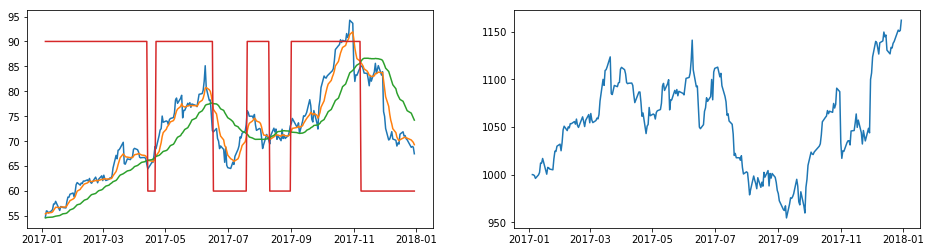

In [194]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].plot(gold[['gold', 'ma10', 'ma30', 'posn']]);
ax[1].plot(gold['portfolio_value']);
print('Long Returns: {}/2'.format(gold['gold'].iloc[-1] / gold['gold'].iloc[0] - 1))
print('Trade Returns: {}'.format(gold['portfolio_value'].iloc[-1] / gold['portfolio_value'].iloc[0] - 1))

## MACD
TODO